In [2]:
# https://keras.io/guides/transfer_learning/

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [6]:
layer = keras.layers.Dense(3)
layer.build((None, 4))  # Create the weights

In [12]:
layer.weights[0].shape

TensorShape([4, 3])

In [8]:
layer.weights

[<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[ 0.7726649 ,  0.2704029 , -0.16388565],
        [-0.07595503,  0.6595634 ,  0.5419725 ],
        [-0.8045789 , -0.0976091 , -0.3476761 ],
        [ 0.5677179 ,  0.8206359 ,  0.7510587 ]], dtype=float32)>,
 <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [13]:
layer.trainable_weights[0].shape

TensorShape([4, 3])

In [9]:
layer.trainable_weights

[<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[ 0.7726649 ,  0.2704029 , -0.16388565],
        [-0.07595503,  0.6595634 ,  0.5419725 ],
        [-0.8045789 , -0.0976091 , -0.3476761 ],
        [ 0.5677179 ,  0.8206359 ,  0.7510587 ]], dtype=float32)>,
 <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [10]:
layer.non_trainable_weights

[]

In [7]:
print("weights:", len(layer.weights))
print("trainable_weights:", len(layer.trainable_weights))
print("non_trainable_weights:", len(layer.non_trainable_weights))

weights: 2
trainable_weights: 2
non_trainable_weights: 0


In [23]:
#BatchNormalization

In general, all weights are trainable weights.The only built-in layer that has non-trainable weights is the BatchNormalization layer. It uses non-trainable weights to keep track of the mean and variance of its inputs during training. To learn how to use non-trainable weights in your own custom layers, see the

In [17]:
layer = keras.layers.BatchNormalization()
layer.build((None, 4))  # Create the weights

print("weights:", len(layer.weights))
print("trainable_weights:", len(layer.trainable_weights))
print("non_trainable_weights:", len(layer.non_trainable_weights))

weights: 4
trainable_weights: 2
non_trainable_weights: 2


In [19]:
layer.weights

[<tf.Variable 'gamma:0' shape=(4,) dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>,
 <tf.Variable 'beta:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'moving_mean:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'moving_variance:0' shape=(4,) dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>]

In [22]:
layer.weights[0].shape

TensorShape([4])

In [18]:
layer.trainable_weights

[<tf.Variable 'gamma:0' shape=(4,) dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>,
 <tf.Variable 'beta:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

In [24]:
#freezing weights

Layers & models also feature a boolean attribute trainable. Its value can be changed. Setting layer.trainable to False moves all the layer's weights from trainable to non-trainable. This is called "freezing" the layer: the state of a frozen layer won't be updated during training (either when training with fit() or when training with any custom loop that relies on trainable_weights to apply gradient updates).

In [25]:
layer = keras.layers.Dense(3)
layer.build((None, 4))  # Create the weights
layer.trainable = False  # Freeze the layer

print("weights:", len(layer.weights))
print("trainable_weights:", len(layer.trainable_weights))
print("non_trainable_weights:", len(layer.non_trainable_weights))

weights: 2
trainable_weights: 0
non_trainable_weights: 2


<h3> Basic  model

In [28]:
layer1 = keras.layers.Dense(3, activation='relu')
layer2 = keras.layers.Dense(3, activation='sigmoid')

model= keras.Sequential([
    keras.Input(shape=(3,)),
    layer1,
    layer2
])

layer1.trainable =False

initial_layer1_weights_values = layer1.get_weights()

model.compile(optimizer='adam', loss ='mse')
model.fit(np.random.random((2,3)),np.random.random((2,3)))



1/1 [==============================] - 1s 654ms/step - loss: 0.1253


In [31]:
final_layer1_weights_values = layer1.get_weights()

In [33]:
# Check that the weights of layer1 have not changed during training

In [30]:
initial_layer1_weights_values

[array([[ 0.3346138 , -0.22402811,  0.48949194],
        [ 0.14480329, -0.41905713, -0.28751135],
        [ 0.5435159 , -0.14605594,  0.916908  ]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

In [32]:
final_layer1_weights_values

[array([[ 0.3346138 , -0.22402811,  0.48949194],
        [ 0.14480329, -0.41905713, -0.28751135],
        [ 0.5435159 , -0.14605594,  0.916908  ]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

In [35]:
np.testing.assert_allclose(
    initial_layer1_weights_values[0], final_layer1_weights_values[0]
)

In [36]:
np.testing.assert_allclose(
    initial_layer1_weights_values[1], final_layer1_weights_values[1]
)

<h3> Model trainable = False<br></h3> If you set trainable = False on a model or on any layer that has sublayers, all children layers become non-trainable as well.

In [38]:
inner_model = keras.Sequential(
    [
        keras.Input(shape=(3,)),
        keras.layers.Dense(3, activation="relu"),
        keras.layers.Dense(3, activation="relu"),
    ]
)

model = keras.Sequential(
    [keras.Input(shape=(3,)), inner_model, keras.layers.Dense(3, activation="sigmoid"),]
)

model.trainable = False  # Freeze the outer model

assert inner_model.trainable == False  # All layers in `model` are now frozen
assert inner_model.layers[0].trainable == False  # `trainable` is propagated recursively

In [40]:
inner_model.layers

In [39]:
inner_model.layers[0].weights

[<tf.Variable 'dense_13/kernel:0' shape=(3, 3) dtype=float32, numpy=
 array([[ 0.25490737, -0.68059325, -0.7235925 ],
        [ 0.9406531 ,  0.6601198 , -0.40165043],
        [ 0.0378511 ,  0.850991  , -0.45965838]], dtype=float32)>,
 <tf.Variable 'dense_13/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [42]:
inner_model.layers[0].trainable_weights

[]

In [43]:
inner_model.layers[1].trainable_weights

[]

In [46]:
inner_model.layers[0].non_trainable_weights

[<tf.Variable 'dense_13/kernel:0' shape=(3, 3) dtype=float32, numpy=
 array([[ 0.25490737, -0.68059325, -0.7235925 ],
        [ 0.9406531 ,  0.6601198 , -0.40165043],
        [ 0.0378511 ,  0.850991  , -0.45965838]], dtype=float32)>,
 <tf.Variable 'dense_13/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [45]:
inner_model.layers[1].non_trainable_weights

[<tf.Variable 'dense_14/kernel:0' shape=(3, 3) dtype=float32, numpy=
 array([[ 0.08433962, -0.63207245,  0.9328685 ],
        [-0.04077101, -0.30895042, -0.74753785],
        [ 0.4277315 ,  0.9345143 ,  0.42209005]], dtype=float32)>,
 <tf.Variable 'dense_14/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

<h2>Basic TL workflow</h2>

In [47]:
# Make a Base Model eg: VGG, Inception ...
# 1 base.model.trainable = False
# create new model top , Inputs with shape of last output of Base Model

# 2 base model( inputs, training = False )

# Convert features of shape `base_model.output_shape[1:]` to vectors
# 3 Add global AveragePooling2D()

# A Dense classifier with a single unit OR multiclass (binary classification)
# 4 Output =  Keras.layers.Dense(num_class)

#5 #keras.Model( input, output)

# 6 model.compile(optimizer = Adam,
                    #loss =
                    #metrics = )
#7 model.fit ( new_database , epochs =20 , callbacks = ... , validation_data)



In [141]:
base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(299, 299, 3),
    include_top=True)  # D

91884032/91884032 [==============================] - 40s 0us/step


In [63]:
dir(base_model)

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_input_shape',
 '_call_spec',
 '_callable_losses',
 '_captured_weight_regularizer',
 '_cast_single_input',
 '_check_call_args',
 '_check_sample_weight_warning',
 '_checkpoint',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_cl

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

In [77]:
np.ones((1,150, 150, 3))/255

array([[[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        ...,

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]

In [81]:
base_model.predict(np.ones((1,150, 150, 3))).max()

1/1 [==============================] - 0s 172ms/step


0.8937976

In [83]:
from keras_preprocessing.image.utils import img_to_array
from keras.utils import load_img

In [86]:
pwd

'/Users/user/Desktop/2023python/transferlearning'

In [235]:
image = tf.keras.preprocessing.image.load_img("goldfish.png",target_size=(299, 299))

In [236]:
input_arr1 = tf.keras.preprocessing.image.img_to_array(image)

In [237]:
input_arr1.shape

(299, 299, 3)

In [238]:
input_arr2 = np.array([input_arr1])

In [239]:
input_arr2.shape

(1, 299, 299, 3)

In [240]:
from tensorflow.keras.applications.xception import decode_predictions

In [246]:
base_model.predict(input_arr2)

1/1 [==============================] - 0s 274ms/step


array([[4.59181590e-16, 1.65827706e-14, 3.16600015e-15, 1.01307498e-19,
        1.26056194e-18, 9.70999129e-21, 1.10643695e-25, 1.12476052e-19,
        1.81117580e-19, 1.56658280e-17, 1.29500100e-12, 3.61480771e-20,
        1.41506923e-12, 2.55306388e-21, 2.85778017e-21, 5.19709330e-26,
        8.91931318e-14, 1.28862965e-19, 2.05611093e-24, 9.63215841e-19,
        1.56230251e-26, 3.06537590e-22, 1.38918522e-19, 3.41624397e-15,
        3.45986870e-20, 4.19252713e-14, 3.11080424e-19, 1.89722630e-20,
        6.67369159e-16, 3.09064394e-22, 9.74142483e-19, 4.94697829e-08,
        1.30908234e-19, 1.47618321e-17, 1.04906629e-15, 2.36522663e-22,
        9.34510334e-20, 3.97169903e-18, 8.51962104e-22, 2.00423058e-19,
        3.67656166e-12, 7.03083263e-23, 4.87778771e-18, 9.37467156e-19,
        1.39725016e-23, 6.27687849e-20, 2.85917096e-13, 4.20576170e-20,
        4.18208637e-19, 1.39963735e-12, 3.17899401e-10, 3.04791609e-10,
        2.29901343e-24, 1.24114491e-13, 1.83024877e-18, 1.890332

In [247]:
base_model.predict(input_arr2).max()

1/1 [==============================] - 0s 289ms/step


0.9369967

In [248]:
xception.decode_predictions(base_model.predict(input_arr2), top=10)

1/1 [==============================] - 0s 326ms/step


[[('n03942813', 'ping-pong_ball', 0.9369967),
  ('n02769748', 'backpack', 0.057872184),
  ('n03763968', 'military_uniform', 0.0040995413),
  ('n02115641', 'dingo', 0.000494265),
  ('n06359193', 'web_site', 0.00014459796),
  ('n04380533', 'table_lamp', 0.00010696511),
  ('n03825788', 'nipple', 9.5088486e-05),
  ('n03594945', 'jeep', 5.476378e-05),
  ('n07747607', 'orange', 4.925829e-05),
  ('n04356056', 'sunglasses', 2.9267132e-05)]]

In [149]:

from tensorflow.keras.applications import xception
from tensorflow.keras.applications.xception import Xception


In [154]:
#Load Sea Lion jpeg image from local and set target size to 224 x 224
img = tf.keras.preprocessing.image.load_img("goldfish.png",target_size=(299, 299))


In [155]:
#convert image to array
input_img = tf.keras.preprocessing.image.img_to_array(img)
input_img = np.expand_dims(input_img, axis=0)
input_img = xception.preprocess_input(input_img)
input_img

array([[[[-0.96862745, -0.8745098 , -0.9372549 ],
         [-0.96862745, -0.8745098 , -0.92941177],
         [-0.9764706 , -0.8745098 , -0.92156863],
         ...,
         [ 0.67058825,  0.7254902 ,  0.3803922 ],
         [ 0.6       ,  0.654902  ,  0.3176471 ],
         [ 0.5372549 ,  0.58431375,  0.254902  ]],

        [[-0.96862745, -0.8745098 , -0.9372549 ],
         [-0.96862745, -0.8745098 , -0.92941177],
         [-0.9764706 , -0.8745098 , -0.92156863],
         ...,
         [ 0.67058825,  0.7254902 ,  0.3803922 ],
         [ 0.6       ,  0.654902  ,  0.3176471 ],
         [ 0.5372549 ,  0.58431375,  0.254902  ]],

        [[-0.96862745, -0.8745098 , -0.9372549 ],
         [-0.96862745, -0.8745098 , -0.92941177],
         [-0.9764706 , -0.8745098 , -0.92156863],
         ...,
         [ 0.6862745 ,  0.73333335,  0.39607847],
         [ 0.6156863 ,  0.67058825,  0.32549024],
         [ 0.5529412 ,  0.6       ,  0.27058828]],

        ...,

        [[-0.92156863, -0.90588236, -0

In [153]:
#Let's predict top 5 results
top_five_predict = xception.decode_predictions(predict_img, top=5)
top_five_predict

ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 5, 5, 2048)

In [156]:
#Predict the inputs on the model
predict_img = base_model.predict(input_img)
predict_img

1/1 [==============================] - 0s 364ms/step


array([[2.77331285e-03, 9.19955432e-01, 3.64294319e-05, 4.50270927e-05,
        5.22071932e-05, 1.51485467e-04, 9.34421496e-06, 1.33676149e-04,
        5.93115910e-05, 2.62096255e-05, 9.15055352e-05, 5.32561317e-05,
        1.46946768e-04, 2.66557745e-05, 3.88458539e-05, 4.01545112e-05,
        3.87854379e-05, 4.01199832e-05, 2.46295785e-05, 5.84229092e-05,
        4.75795023e-05, 1.82435586e-04, 5.90598538e-05, 3.08872877e-05,
        2.84113430e-05, 1.05977335e-04, 1.25063700e-04, 2.28976322e-04,
        3.54204167e-05, 8.92396900e-04, 4.02033656e-05, 8.26926480e-05,
        6.23743981e-05, 1.23133213e-04, 3.03290108e-05, 1.25855513e-04,
        1.14561939e-04, 4.81684147e-05, 1.32610337e-04, 2.76674673e-05,
        1.09314104e-04, 6.07844013e-05, 1.29010630e-04, 8.52454541e-05,
        3.02601911e-05, 4.56875168e-05, 5.27619777e-05, 8.45190152e-05,
        5.01710783e-05, 3.57446916e-05, 1.97499794e-05, 3.79405246e-05,
        1.31881869e-04, 8.12504513e-05, 3.54935255e-05, 7.890451

In [130]:
tf.keras.applications.xception.decode_predictions(
    base_model.predict(input_arr).flatten()[:1000], top=5
)

1/1 [==============================] - 0s 109ms/step


ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1000,)

In [129]:
base_model.predict(input_arr).flatten()[:1000]

1/1 [==============================] - 0s 113ms/step


array([0.00000000e+00, 1.64376450e+01, 5.47142315e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.92401505e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.76717815e+01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.04403782e+00, 2.36788063e+01,
       0.00000000e+00, 3.82695503e+01, 2.72686625e+00, 1.77012157e+01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [49]:
base_model.trainable = False
inputs = keras.Input(shape=(150, 150, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)


In [50]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])
model.fit(new_dataset, epochs=20, callbacks=..., validation_data=...)

NameError: name 'new_dataset' is not defined

<h3> Fine tuning 

Once your model has converged on the new data, you can try to unfreeze all or part of the base model and retrain the whole model end-to-end with a very low learning rate.

This is an optional last step that can potentially give you incremental improvements. It could also potentially lead to quick overfitting -- keep that in mind.

It is critical to only do this step after the model with frozen layers has been trained to convergence. If you mix randomly-initialized trainable layers with trainable layers that hold pre-trained features, the randomly-initialized layers will cause very large gradient updates during training, which will destroy your pre-trained features.

It's also critical to use a very low learning rate at this stage, because you are training a much larger model than in the first round of training, on a dataset that is typically very small. As a result, you are at risk of overfitting very quickly if you apply large weight updates. Here, you only want to readapt the pretrained weights in an incremental way.

This is how to implement fine-tuning of the whole base model:

In [51]:
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model.compile(optimizer=keras.optimizers.Adam(1e-5),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

# Train end-to-end. Be careful to stop before you overfit!
model.fit(new_dataset, epochs=10, callbacks=..., validation_data=...)

NameError: name 'new_dataset' is not defined

<h1>Custom Dataset

In [249]:
import tensorflow_datasets as tfds

In [250]:
pwd

'/Users/user/Desktop/2023python/transferlearning'

In [251]:
ls

Transferlearning in Keras from scratch.ipynb
Transferlearning.py
cats_and_dogs_filtered/
cats_and_dogs_filtered.zip
goldfish.png
test_sparrow.png


In [257]:
cats_vs_dogs = tf.keras.utils.image_dataset_from_directory(
    "cats_and_dogs_filtered",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 3000 files belonging to 2 classes.


In [258]:
cats_vs_dogs

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [266]:
ls

Transferlearning in Keras from scratch.ipynb
Transferlearning.py
cats_and_dogs_filtered/
cats_and_dogs_filtered.zip
goldfish.png
test_sparrow.png
~/


In [329]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "cats_and_dogs_filtered/train",
  seed=123,
  image_size=(250, 250))


Found 2000 files belonging to 2 classes.


In [330]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "cats_and_dogs_filtered/test",
  seed=123,
  image_size=(250, 250))


Found 1000 files belonging to 2 classes.


In [331]:
validation_ds= tf.keras.preprocessing.image_dataset_from_directory(
  "cats_and_dogs_filtered/validation",
  seed=123,
  image_size=(250, 250))

Found 1000 files belonging to 2 classes.


In [332]:
train_ds =train_ds.unbatch()

In [333]:
train_ds =test_ds.unbatch()

In [334]:
validation_ds =validation_ds.unbatch()

In [316]:
for i,l in train_ds.take(1):
    print(i.numpy().shape())

TypeError: 'tuple' object is not callable

In [304]:
plt.imshow(train_ds.take(1)[0].numpy().astype("uint8"))
plt.title(int(label))
plt.axis("off")

TypeError: 'TakeDataset' object is not subscriptable

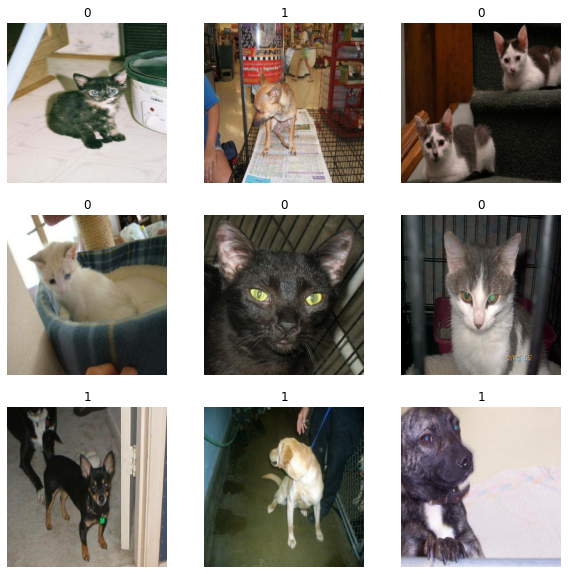

In [335]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(int(label))
    plt.axis("off")

In [336]:
size = (150, 150)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

In [337]:
batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=10)

In [340]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1),]
)

In [327]:
train_ds.unbatch()

<_UnbatchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [325]:
for i , l in train_ds.take(1):
    print(i.shape)
    print(i[:,:,150, 150, 3])

(32, 32, 150, 150, 3)


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 150 of dimension 2 out of bounds. [Op:StridedSlice] name: strided_slice/

In [320]:
augmented_image = data_augmentation(
            tf.expand_dims(train_ds, 0), training=True
        )

ValueError: Attempt to convert a value (<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int32, name=None))>) with an unsupported type (<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>) to a Tensor.

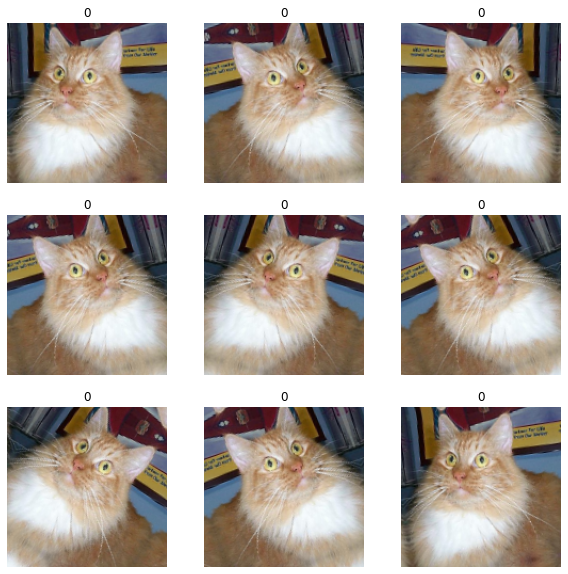

In [342]:
import numpy as np

for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(int(labels[0]))
        plt.axis("off")

In [343]:
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)  # Apply random data augmentation

# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(x)

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 sequential_8 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                           

In [344]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 2
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Epoch 1/2


32/32 [==============================] - 126s 4s/step - loss: 0.3484 - binary_accuracy: 0.8390 - val_loss: 0.1257 - val_binary_accuracy: 0.9630
Epoch 2/2
32/32 [==============================] - 107s 3s/step - loss: 0.1553 - binary_accuracy: 0.9440 - val_loss: 0.0870 - val_binary_accuracy: 0.9670
